In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
df = pd.read_csv('Practice 1 water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
index = df.index
columns = df.columns

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)

df.index = index  


In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.shape

(3276, 10)

In [11]:
# Feature Engineering
df['Water_Quality_Index'] = (df['ph'] * df['Conductivity']) / df['Turbidity']
df['Salt_Content'] = df['Solids'] / df['Conductivity']
df['ph_conductivity_ratio'] = df['ph'] / df['Conductivity']
df['hardness_carbon_ratio'] = df['Hardness'] / df['Organic_carbon']
df['sulfate_chloramine_ratio'] = df['Sulfate'] / df['Chloramines']

In [12]:
# df.drop(['ph', 'Conductivity', 'Turbidity', 'Solids', 'Hardness', 'Organic_carbon', 'Sulfate'], axis=1, inplace=True)

In [13]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Selection
selector = SelectKBest(f_classif, k=6)  # Keep top 6 features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

smote = SMOTE(k_neighbors=3, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# adasyn = ADASYN(random_state=42)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
param_grid = {
    'criterion': ['gini'], 
    'max_depth': [8, 10, 12, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'ccp_alpha': [0.001, 0.01, 0.05],
    'class_weight':['balanced'],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Parameters:", grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Parameters: 0.5694615610328639


In [17]:
classifier = DecisionTreeClassifier(**grid_search.best_params_)

classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_leaf=15)

In [18]:
y_pred = classifier.predict(X_test)
# Proba of test sample belonging class 1
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.58
Confusion Matrix:
 [[292 108]
 [168  88]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.73      0.68       400
         1.0       0.45      0.34      0.39       256

    accuracy                           0.58       656
   macro avg       0.54      0.54      0.53       656
weighted avg       0.56      0.58      0.57       656



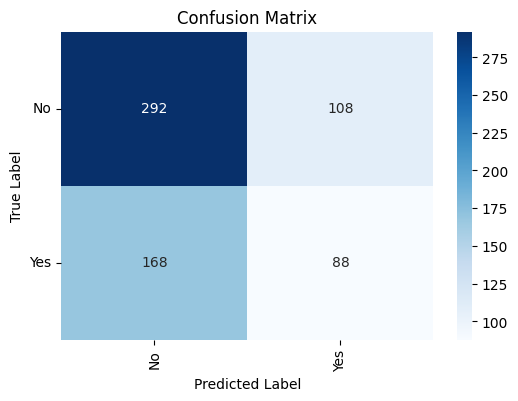

In [20]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


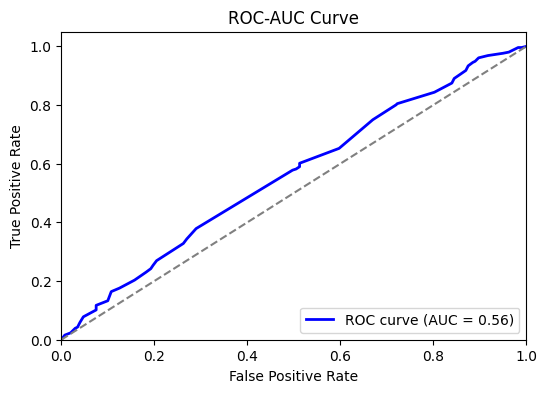

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score", roc_auc)

ROC AUC Score 0.536875
